In [45]:
import pandas as pd
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import torch.utils.data as data
import numpy as np

import seaborn as sns
from PIL import Image

from sklearn.metrics import confusion_matrix

import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [12]:
data_dir = r"E:\ML\Dataset\all_images"
print(data_dir)

E:\ML\Dataset\all_images


In [13]:
dest_dir = r"E:\ML\Dataset\reorganised"

In [14]:
skin_df = pd.read_csv('E:\ML\Dataset/HAM10000_metadata.csv')
print(skin_df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [15]:
label=skin_df['dx'].unique().tolist()  #Extract labels into a list that we are classifying
label_images = []

In [16]:
dest_dir = os.path.abspath(r"E:\ML\Dataset\reorganised") 
os.makedirs(dest_dir, exist_ok=True) 
# Loop through labels and create subdirectories
for label_name in label:
    class_dir = os.path.join(dest_dir, str(label_name))
    os.makedirs(class_dir, exist_ok=True)  # Creates the directory if it doesn't exist
    print(f"Created directory: {class_dir}")

    # Process the images for the current label
    sample = skin_df[skin_df['dx'] == label_name]['image_id']
    for image_id in sample:
        src_path = os.path.join("E:\ML/Dataset/all_images", f"{image_id}.jpg")  
        dest_path = os.path.join(class_dir, f"{image_id}.jpg")
        if os.path.exists(src_path):
            os.rename(src_path, dest_path)  # Move or copy the file
        else:
            print(f"Image not found: {src_path}")

Created directory: E:\ML\Dataset\reorganised\bkl
Image not found: E:\ML/Dataset/all_images\ISIC_0027419.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0025030.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0026769.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0025661.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0031633.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0027850.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0029176.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0029068.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0025837.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0025209.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0025276.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0029396.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0025984.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0025767.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0032417.jpg
Image not found: E:\ML/Dataset/all_images\ISIC_0031326.jpg
Image n

In [17]:
# Define data generator
datagen = ImageDataGenerator(rescale=1.0/255)

In [18]:
train_dir = r"E:\ML\Dataset\reorganised"

# Verify that the directory exists and contains subfolders
if os.path.exists(train_dir):
    print(f"Directory exists: {train_dir}")
    print(f"Subfolders found: {os.listdir(train_dir)}")

    # Initialize the ImageDataGenerator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    
    # Load images from the subfolders
    train_data = datagen.flow_from_directory(directory=train_dir,
                                             target_size=(64, 64),
                                             batch_size=16,
                                             class_mode='categorical')
    print(train_data.class_indices)  # Check the class indices
else:
    print(f"Directory does not exist: {train_dir}")

Directory exists: E:\ML\Dataset\reorganised
Subfolders found: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
Found 10015 images belonging to 7 classes.
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


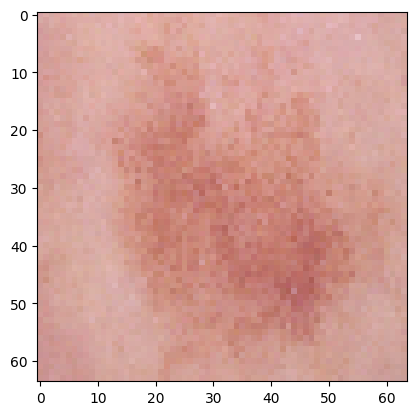

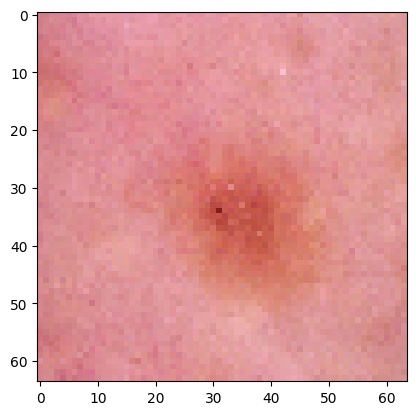

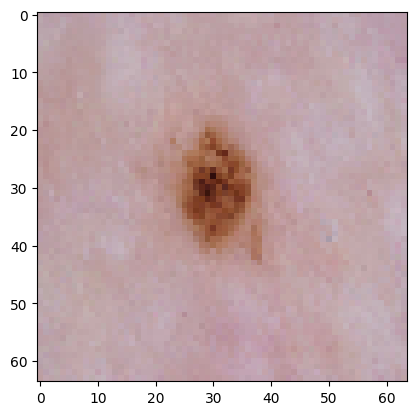

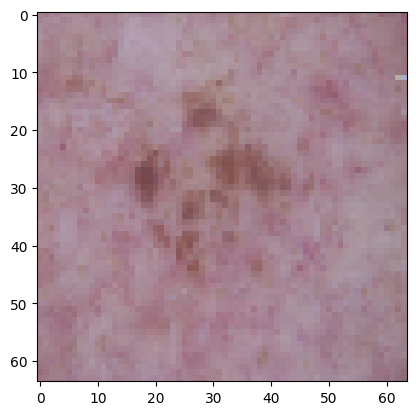

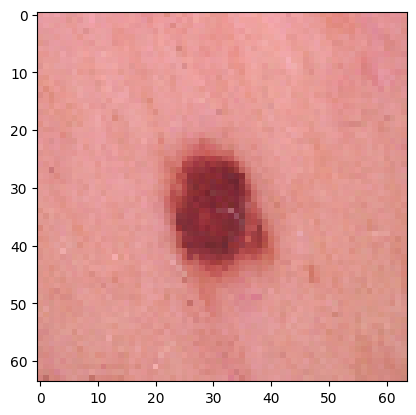

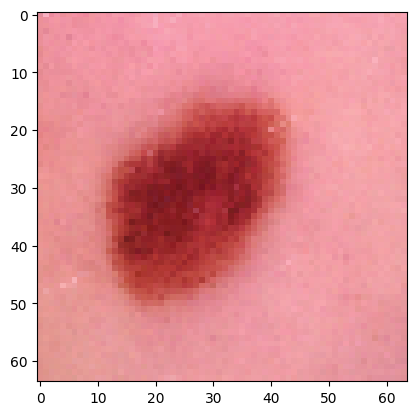

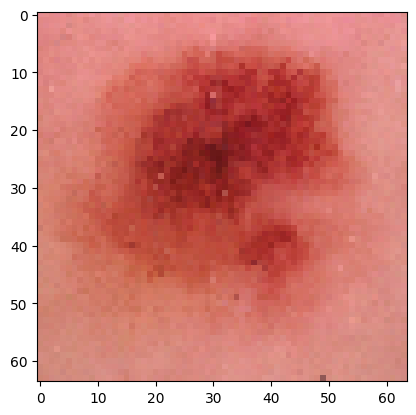

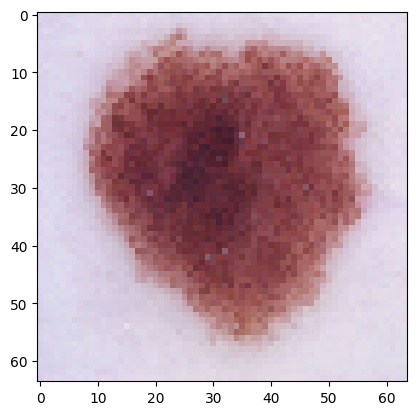

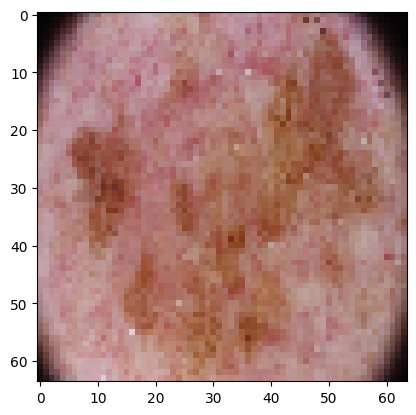

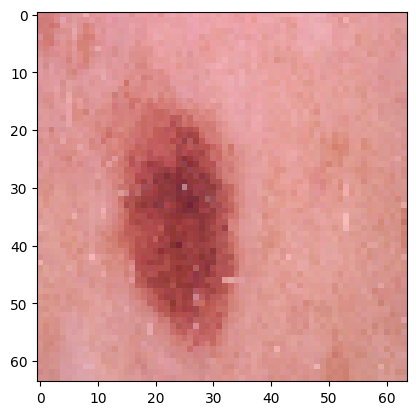

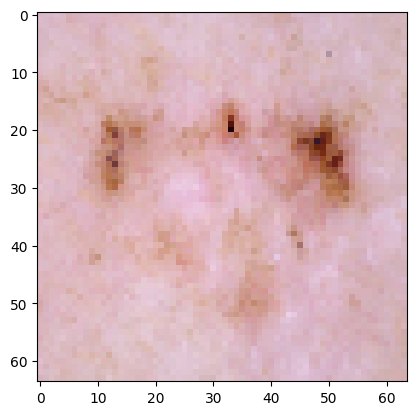

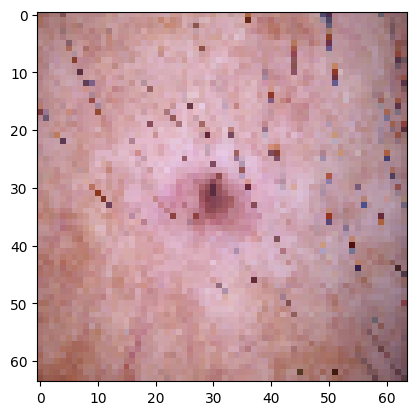

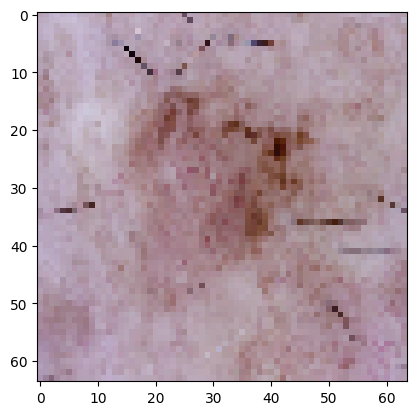

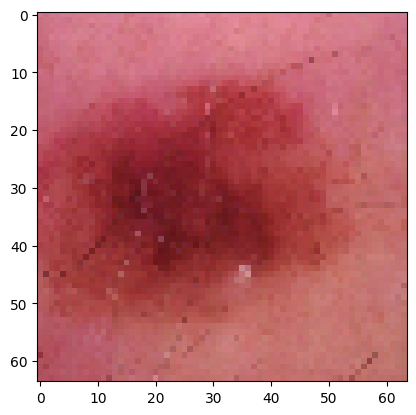

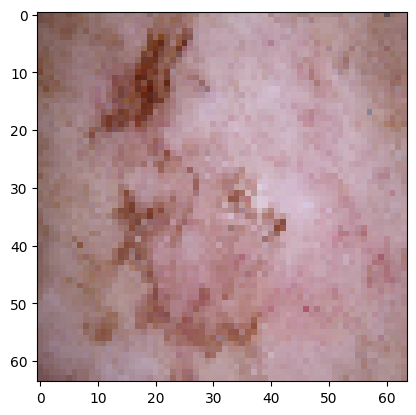

In [19]:
#We can check images for a single batch.
x, y = next(train_data)
#View each image
for i in range (0,15):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [21]:
#Define root directory with subdirectories
train_dir = r"E:\ML\Dataset\reorganised"

In [22]:
#If you want to apply ransforms
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),       # Converts your input image to PyTorch tensor.
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5] )
    ])

In [23]:
train_data_torch = torchvision.datasets.ImageFolder(root=train_dir)

In [24]:
train_data_loader_torch = data.DataLoader(train_data_torch, batch_size=len(train_data_torch))
   

In [25]:
print("Number of train samples: ", len(train_data_torch))    
print("Detected Classes are: ", train_data_torch.class_to_idx) 
# classes are detected by folder structure 

Number of train samples:  10015
Detected Classes are:  {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [26]:
labels = np.array(train_data_torch.targets)
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0  327]
 [   1  514]
 [   2 1099]
 [   3  115]
 [   4 1113]
 [   5 6705]
 [   6  142]]


In [28]:
skin_df = pd.read_csv('E:\ML\Dataset/HAM10000_metadata.csv')


In [29]:
SIZE=64

In [30]:
# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [31]:
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))

        lesion_id      image_id   dx    dx_type   age      sex  \
971   HAM_0000948  ISIC_0033631  bkl  consensus   NaN  unknown   
606   HAM_0005865  ISIC_0031522  bkl      histo  70.0     male   
7198  HAM_0005116  ISIC_0032953   nv      histo   5.0   female   
695   HAM_0003015  ISIC_0025083  bkl      histo  55.0     male   
787   HAM_0002042  ISIC_0028294  bkl   confocal  75.0   female   
6936  HAM_0004869  ISIC_0025370   nv      histo  15.0   female   
6292  HAM_0004162  ISIC_0031944   nv  follow_up  65.0     male   
9323  HAM_0006553  ISIC_0026942   nv  consensus  20.0   female   
7480  HAM_0007306  ISIC_0026810   nv      histo  30.0     male   
8886  HAM_0004518  ISIC_0024578   nv      histo  35.0   female   

         localization  label  
971           unknown      2  
606             chest      2  
7198  lower extremity      5  
695              back      2  
787              face      2  
6936  lower extremity      5  
6292             back      5  
9323             face    

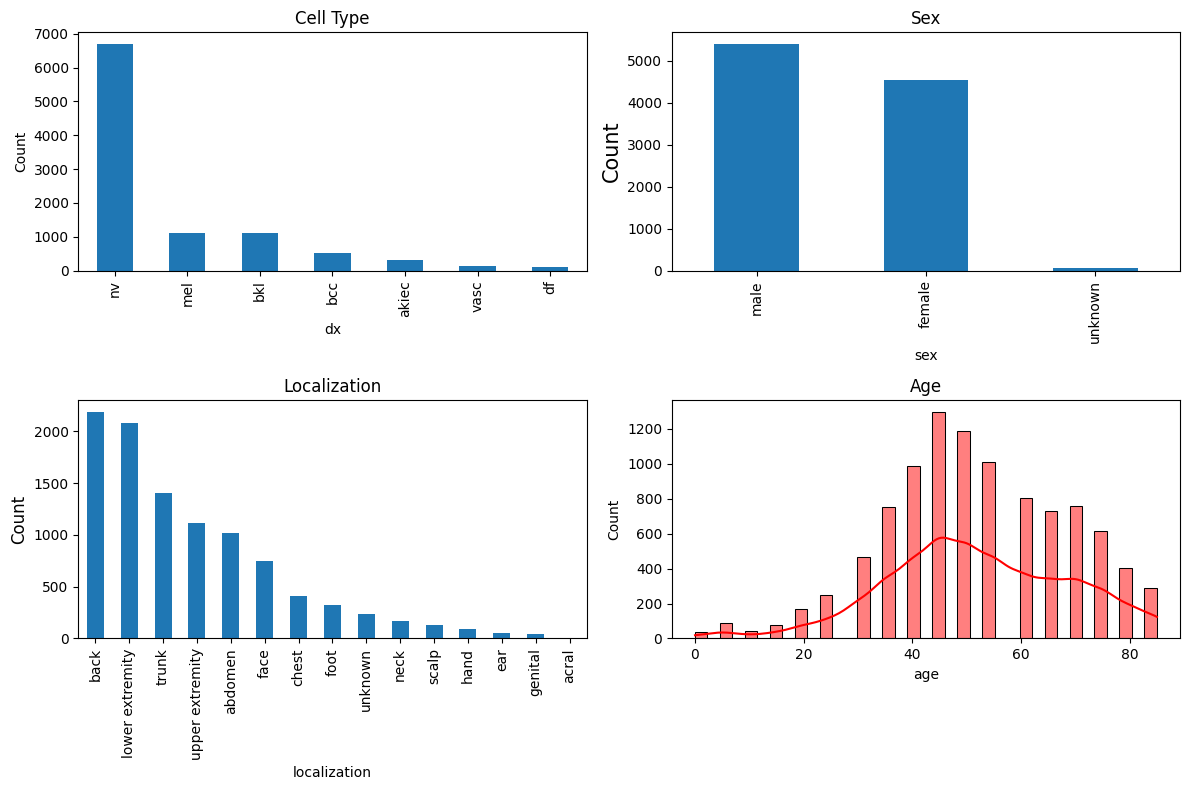

In [32]:
# Data distribution visualization
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type')

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex')

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count', size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.histplot(sample_age['age'], kde=True, color='red', ax=ax4)  # Replace distplot with histplot
ax4.set_title('Age')

plt.tight_layout()
plt.show()


In [33]:
# Distribution of data into various classes 
from sklearn.utils import resample
print(skin_df['label'].value_counts())

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64


In [34]:
#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]
n_samples=500 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)


In [35]:
#Combined back to a single dataframe
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [36]:
#Check the distribution. All classes should be balanced now.
print(skin_df_balanced['label'].value_counts())

label
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: count, dtype: int64


In [42]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(r"E:\ML\Dataset\reorganised", '*', '*.jpg'))}

In [38]:
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

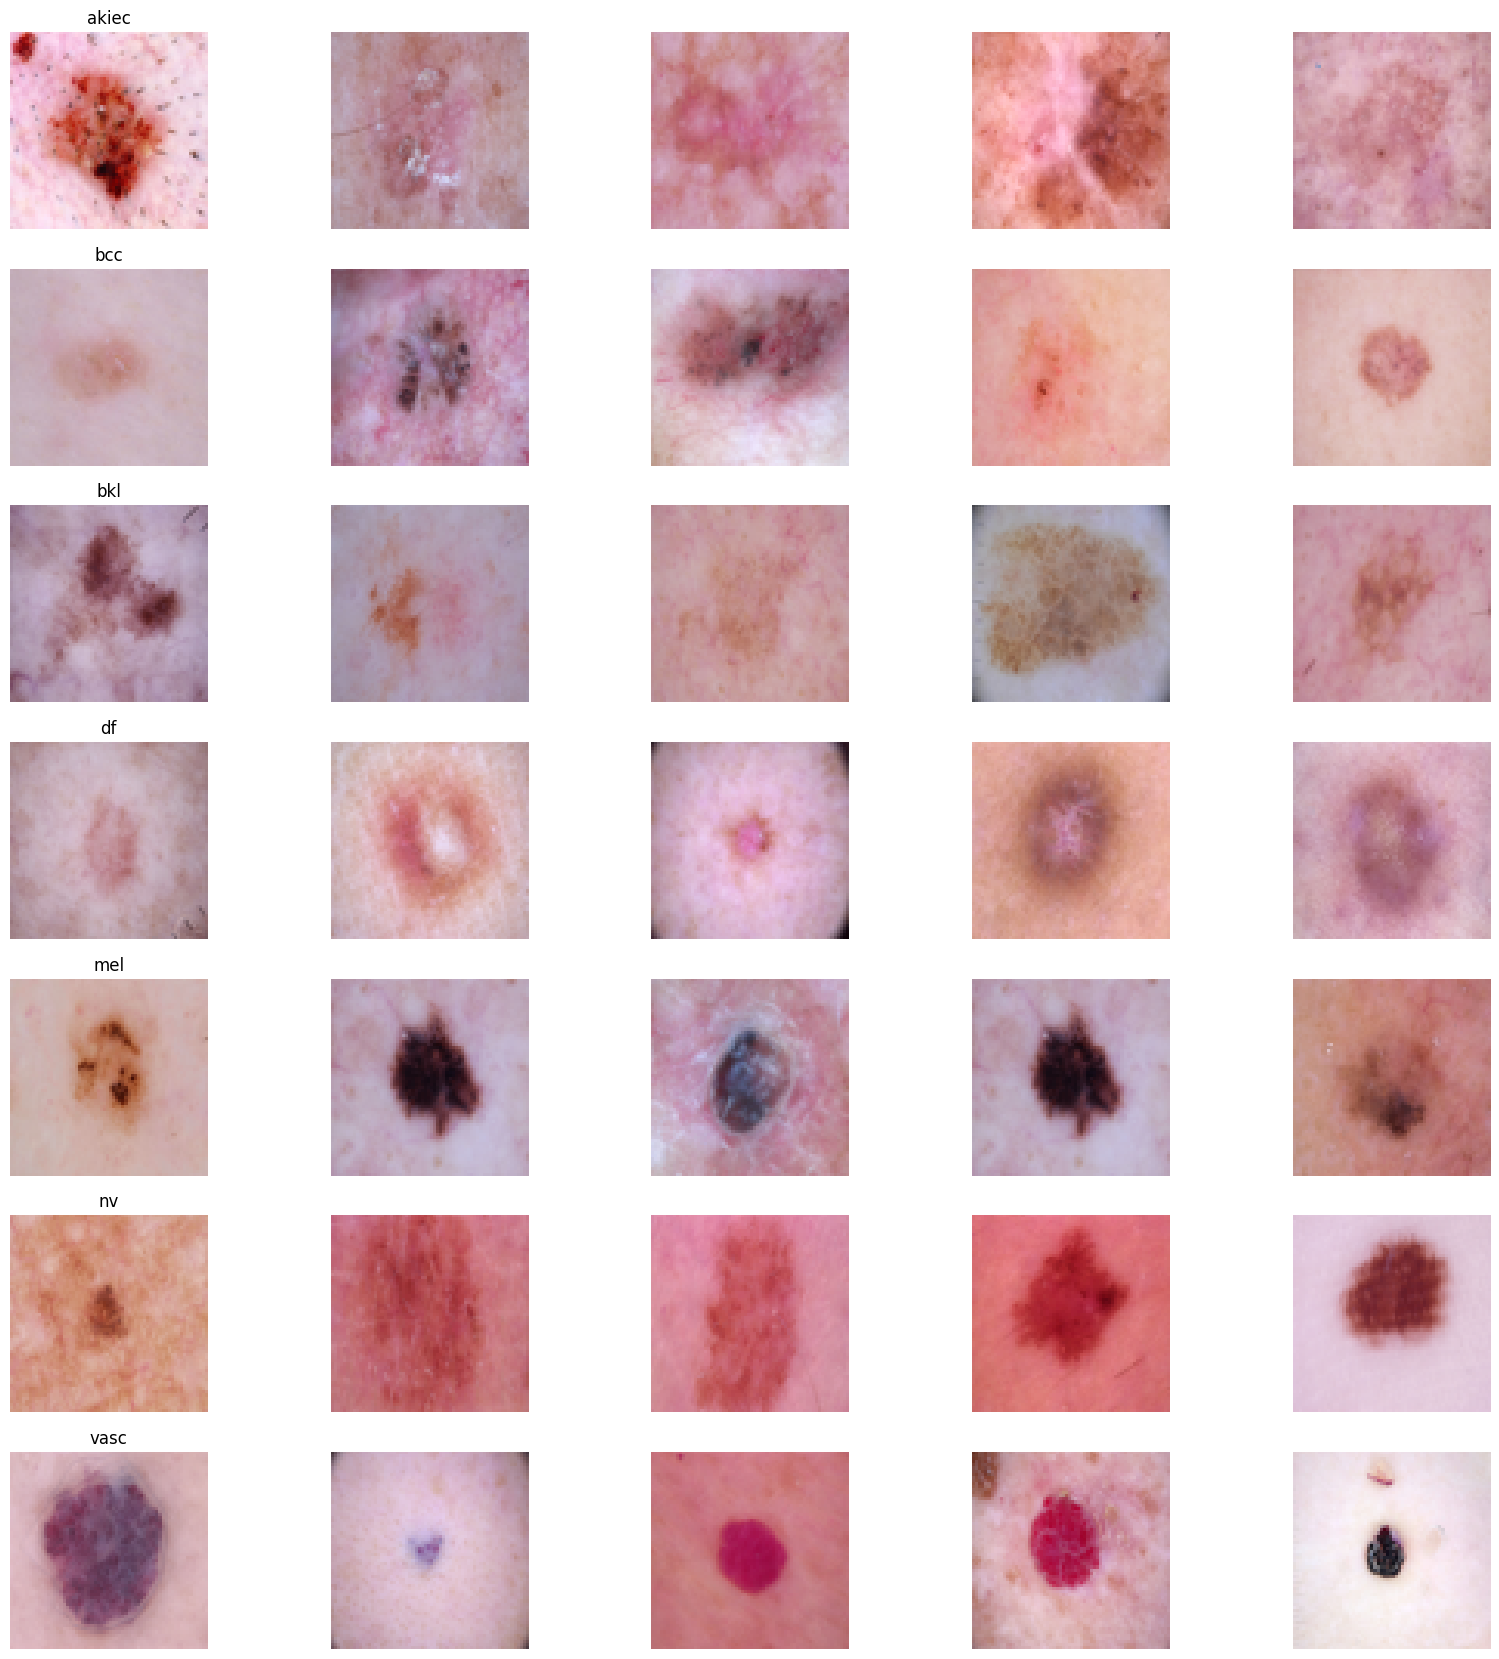

In [39]:
n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [40]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255. 
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [32]:
#Define the model.
#You can also load pretrained networks such as mobilenet or VGG16

num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

C:\Users\garvb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          73,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449,991 (1.72 MB)

 Trainable params: 449,991 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35
165/165 - 10s - 63ms/step - acc: 0.2019 - loss: 1.8735 - val_acc: 0.2583 - val_loss: 1.7879
Epoch 2/35
165/165 - 9s - 56ms/step - acc: 0.3010 - loss: 1.6990 - val_acc: 0.3749 - val_loss: 1.6018
Epoch 3/35
165/165 - 10s - 60ms/step - acc: 0.3775 - loss: 1.5141 - val_acc: 0.3760 - val_loss: 1.5432
Epoch 4/35
165/165 - 9s - 58ms/step - acc: 0.4202 - loss: 1.4336 - val_acc: 0.4377 - val_loss: 1.3982
Epoch 5/35
165/165 - 10s - 58ms/step - acc: 0.4255 - loss: 1.4173 - val_acc: 0.4709 - val_loss: 1.3570
Epoch 6/35
165/165 - 10s - 61ms/step - acc: 0.4914 - loss: 1.2962 - val_acc: 0.4366 - val_loss: 1.4162
Epoch 7/35
165/165 - 10s - 61ms/step - acc: 0.5318 - loss: 1.2169 - val_acc: 0.5360 - val_loss: 1.1601
Epoch 8/35
165/165 - 10s - 62ms/step - acc: 0.5352 - loss: 1.1602 - val_acc: 0.5211 - val_loss: 1.2139
Epoch 9/35
165/165 - 10s - 63ms/step - acc: 0.5646 - loss: 1.1175 - val_acc: 0.5440 - val_loss: 1.1749
Epoch 10/35
165/165 - 11s - 65ms/step - acc: 0.5730 - loss: 1.1054 - val_ac

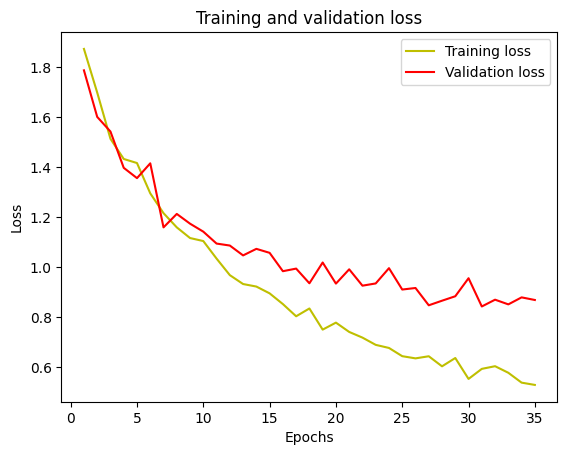

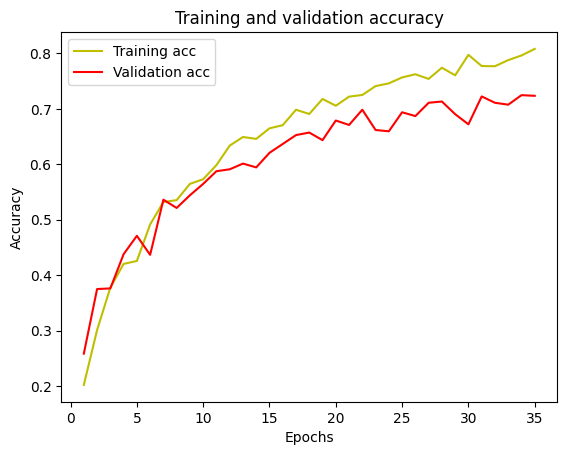

In [33]:

batch_size = 16 
epochs = 35

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
model.save("skinCancerDetection02.keras")

In [38]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                  │ (None, 62, 62, 256)      │         7,168 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)     │ (None, 31, 31, 256)      │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout (Dropout)                │ (None, 31, 31, 256)      │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                │ (None, 29, 29, 128)      │       295,040 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)   │ (None, 14, 14, 128)      │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_1 (Dropout)              │ (None, 14, 14, 128)      │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)                │ (None, 12, 12, 64)       │        73,792 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)   │ (None, 6, 6, 64)         │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_2 (Dropout)              │ (None, 6, 6, 64)         │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten (Flatten)                │ (None, 2304)             │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                    │ (None, 32)               │        73,760 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                  │ (None, 7)                │           231 │
└──────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 1,349,975 (5.15 MB)

 Trainable params: 449,991 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 899,984 (3.43 MB)

In [39]:
# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step 


<Axes: >

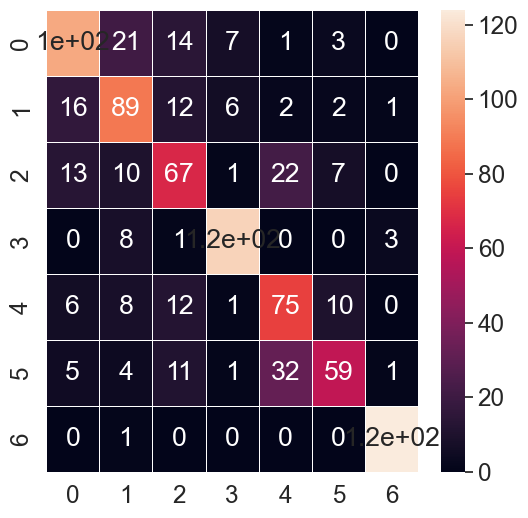

In [40]:
#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

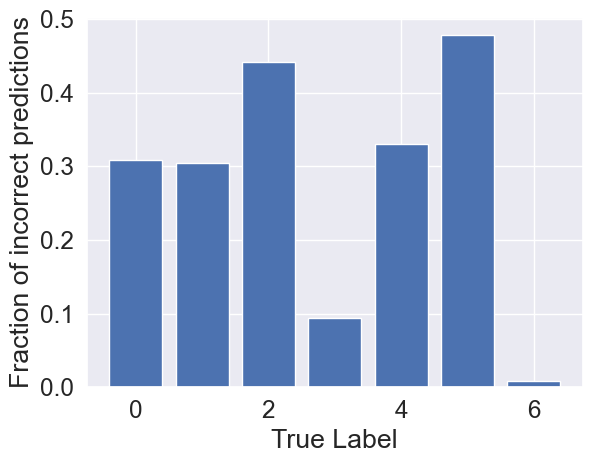

In [41]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')